In [1]:
#import libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import keras as k

In [2]:
#Load Data
df = pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
#Get shape of data
df.shape

(400, 26)

In [4]:
#Create list of columns to keep
column_retain = ["sg", "al", "sc", "hemo", "pcv", "htn", "classification"]

#Drop columns not required
df = df.drop([col for col in df.columns if col not in column_retain],axis=1)

#Drop rows with na or missing value
df = df.dropna()

In [5]:
#Transform non-numeric data
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = LabelEncoder().fit_transform(df[col])

In [6]:
#Print cleaned data set
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [7]:
#split into independent target set and feature set
x = df.drop( ["classification"], axis = 1)
y = df["classification"]

In [8]:
#Feature scaling
#min-max scales dataset so the features lie between 0 and 1
x_scaler = MinMaxScaler()
x_scaler.fit(x)
column_names = x.columns
x[column_names] = x_scaler.transform(x)

In [9]:
#Split into 80% training and 20% testing & shuffle
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True)

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

In [10]:
#Build the model
model = Sequential()
model.add( Dense(256, input_dim = len(x.columns), kernel_initializer = k.initializers.random_normal(seed=13), activation = 'relu') )
model.add( Dense(1, activation='hard_sigmoid') )

Metal device set to: Apple M1 Pro


2022-08-20 19:29:51.475132: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-20 19:29:51.475265: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
#Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
#Train the model
history = model.fit(x_train, y_train, epochs = 2000, batch_size = x_train.shape[0])

Epoch 1/2000


2022-08-20 19:29:51.553145: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-20 19:29:51.712844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 257ms/step - loss: 0.6986 - accuracy: 0.4585
Epoch 2/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.4585
Epoch 3/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6849 - accuracy: 0.4629
Epoch 4/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6781 - accuracy: 0.4672
Epoch 5/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6716 - accuracy: 0.5109
Epoch 6/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6651 - accuracy: 0.5502
Epoch 7/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6588 - accuracy: 0.5983
Epoch 8/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6525 - accuracy: 0.6419
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6463 - accuracy: 0.6900
Epoch 10/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6402 - accuracy: 0.7336
Epoch 11/2000
1/1 [===========

Epoch 84/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.1836 - accuracy: 0.9083
Epoch 85/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.1805 - accuracy: 0.9083
Epoch 86/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.1777 - accuracy: 0.9127
Epoch 87/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.1750 - accuracy: 0.9127
Epoch 88/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.1724 - accuracy: 0.9127
Epoch 89/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.1699 - accuracy: 0.9170
Epoch 90/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.1675 - accuracy: 0.9214
Epoch 91/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.1651 - accuracy: 0.9214
Epoch 92/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.1629 - accuracy: 0.9214
Epoch 93/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.1607 - accuracy: 0.9214
Epoch 94/2

1/1 [==============================] - 0s 5ms/step - loss: 0.0819 - accuracy: 0.9651
Epoch 167/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0814 - accuracy: 0.9651
Epoch 168/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0809 - accuracy: 0.9651
Epoch 169/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0804 - accuracy: 0.9651
Epoch 170/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0799 - accuracy: 0.9651
Epoch 171/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0794 - accuracy: 0.9651
Epoch 172/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0789 - accuracy: 0.9651
Epoch 173/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0784 - accuracy: 0.9651
Epoch 174/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0779 - accuracy: 0.9651
Epoch 175/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0774 - accuracy: 0.9694
Epoch 176/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.0516 - accuracy: 0.9825
Epoch 249/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0513 - accuracy: 0.9825
Epoch 250/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0510 - accuracy: 0.9825
Epoch 251/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0508 - accuracy: 0.9825
Epoch 252/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0505 - accuracy: 0.9825
Epoch 253/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0503 - accuracy: 0.9825
Epoch 254/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0500 - accuracy: 0.9825
Epoch 255/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0497 - accuracy: 0.9825
Epoch 256/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0495 - accuracy: 0.9825
Epoch 257/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0492 - accuracy: 0.9825
Epoch 258/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.9825
Epoch 331/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0364 - accuracy: 0.9825
Epoch 332/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0362 - accuracy: 0.9825
Epoch 333/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0361 - accuracy: 0.9825
Epoch 334/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0360 - accuracy: 0.9825
Epoch 335/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0359 - accuracy: 0.9825
Epoch 336/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0357 - accuracy: 0.9825
Epoch 337/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 0.9825
Epoch 338/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0355 - accuracy: 0.9825
Epoch 339/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0354 - accuracy: 0.9825
Epoch 340/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.0278 - accuracy: 0.9913
Epoch 413/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0277 - accuracy: 0.9913
Epoch 414/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0276 - accuracy: 0.9913
Epoch 415/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0276 - accuracy: 0.9913
Epoch 416/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0275 - accuracy: 0.9913
Epoch 417/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0274 - accuracy: 0.9913
Epoch 418/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0273 - accuracy: 0.9913
Epoch 419/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0272 - accuracy: 0.9913
Epoch 420/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0271 - accuracy: 0.9913
Epoch 421/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0271 - accuracy: 0.9913
Epoch 422/2000


1/1 [==============================] - 0s 6ms/step - loss: 0.0226 - accuracy: 0.9913
Epoch 495/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0226 - accuracy: 0.9913
Epoch 496/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0225 - accuracy: 0.9913
Epoch 497/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0225 - accuracy: 0.9913
Epoch 498/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0224 - accuracy: 0.9913
Epoch 499/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0223 - accuracy: 0.9913
Epoch 500/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0223 - accuracy: 0.9913
Epoch 501/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0222 - accuracy: 0.9913
Epoch 502/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0222 - accuracy: 0.9913
Epoch 503/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0221 - accuracy: 0.9913
Epoch 504/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.0189 - accuracy: 0.9913
Epoch 577/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0189 - accuracy: 0.9913
Epoch 578/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0188 - accuracy: 0.9913
Epoch 579/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0188 - accuracy: 0.9913
Epoch 580/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0188 - accuracy: 0.9913
Epoch 581/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0187 - accuracy: 0.9913
Epoch 582/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0187 - accuracy: 0.9913
Epoch 583/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0187 - accuracy: 0.9913
Epoch 584/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.9913
Epoch 585/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.9913
Epoch 586/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.0168 - accuracy: 0.9913
Epoch 659/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0168 - accuracy: 0.9913
Epoch 660/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0168 - accuracy: 0.9913
Epoch 661/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0168 - accuracy: 0.9913
Epoch 662/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0167 - accuracy: 0.9913
Epoch 663/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0167 - accuracy: 0.9913
Epoch 664/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0167 - accuracy: 0.9913
Epoch 665/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0167 - accuracy: 0.9913
Epoch 666/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0167 - accuracy: 0.9913
Epoch 667/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0166 - accuracy: 0.9913
Epoch 668/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.0155 - accuracy: 0.9956
Epoch 741/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0155 - accuracy: 0.9956
Epoch 742/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0154 - accuracy: 0.9956
Epoch 743/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0154 - accuracy: 0.9956
Epoch 744/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0154 - accuracy: 0.9956
Epoch 745/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0154 - accuracy: 0.9956
Epoch 746/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0154 - accuracy: 0.9956
Epoch 747/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0154 - accuracy: 0.9956
Epoch 748/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0154 - accuracy: 0.9956
Epoch 749/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0153 - accuracy: 0.9956
Epoch 750/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.0143 - accuracy: 0.9956
Epoch 823/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143 - accuracy: 0.9956
Epoch 824/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0143 - accuracy: 0.9956
Epoch 825/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 826/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 827/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 828/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 829/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 830/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 831/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 832/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.0133 - accuracy: 0.9956
Epoch 905/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133 - accuracy: 0.9956
Epoch 906/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0133 - accuracy: 0.9956
Epoch 907/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.9956
Epoch 908/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132 - accuracy: 0.9956
Epoch 909/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132 - accuracy: 0.9956
Epoch 910/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132 - accuracy: 0.9956
Epoch 911/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132 - accuracy: 0.9956
Epoch 912/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132 - accuracy: 0.9956
Epoch 913/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132 - accuracy: 0.9956
Epoch 914/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.0125 - accuracy: 0.9956
Epoch 987/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0125 - accuracy: 0.9956
Epoch 988/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125 - accuracy: 0.9956
Epoch 989/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125 - accuracy: 0.9956
Epoch 990/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0125 - accuracy: 0.9956
Epoch 991/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125 - accuracy: 0.9956
Epoch 992/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125 - accuracy: 0.9956
Epoch 993/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0124 - accuracy: 0.9956
Epoch 994/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124 - accuracy: 0.9956
Epoch 995/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124 - accuracy: 0.9956
Epoch 996/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.0117 - accuracy: 0.9956
Epoch 1068/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0117 - accuracy: 0.9956
Epoch 1069/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0117 - accuracy: 0.9956
Epoch 1070/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0117 - accuracy: 0.9956
Epoch 1071/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0117 - accuracy: 0.9956
Epoch 1072/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0117 - accuracy: 0.9956
Epoch 1073/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0117 - accuracy: 0.9956
Epoch 1074/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1075/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1076/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0116 - accuracy: 0.9956
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.0109 - accuracy: 0.9956
Epoch 1149/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0109 - accuracy: 0.9956
Epoch 1150/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0109 - accuracy: 0.9956
Epoch 1151/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0109 - accuracy: 0.9956
Epoch 1152/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0109 - accuracy: 0.9956
Epoch 1153/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0108 - accuracy: 0.9956
Epoch 1154/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0108 - accuracy: 0.9956
Epoch 1155/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0108 - accuracy: 0.9956
Epoch 1156/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0108 - accuracy: 0.9956
Epoch 1157/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0108 - accuracy: 0.9956
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.0102 - accuracy: 0.9956
Epoch 1230/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0102 - accuracy: 0.9956
Epoch 1231/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0102 - accuracy: 0.9956
Epoch 1232/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0101 - accuracy: 0.9956
Epoch 1233/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0101 - accuracy: 0.9956
Epoch 1234/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0101 - accuracy: 0.9956
Epoch 1235/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0101 - accuracy: 0.9956
Epoch 1236/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0101 - accuracy: 0.9956
Epoch 1237/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0101 - accuracy: 0.9956
Epoch 1238/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0101 - accuracy: 0.9956
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1311/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1312/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1313/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1314/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1315/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1316/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0097 - accuracy: 0.9956
Epoch 1317/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0097 - accuracy: 0.9956
Epoch 1318/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0097 - accuracy: 0.9956
Epoch 1319/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0097 - accuracy: 0.9956
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1392/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1393/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1394/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1395/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1396/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1397/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1398/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1399/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1400/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0094 - accuracy: 0.9956
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.0090 - accuracy: 0.9956
Epoch 1473/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0090 - accuracy: 0.9956
Epoch 1474/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0090 - accuracy: 0.9956
Epoch 1475/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0090 - accuracy: 0.9956
Epoch 1476/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0090 - accuracy: 0.9956
Epoch 1477/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0090 - accuracy: 0.9956
Epoch 1478/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0090 - accuracy: 0.9956
Epoch 1479/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0090 - accuracy: 0.9956
Epoch 1480/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0090 - accuracy: 0.9956
Epoch 1481/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0090 - accuracy: 0.9956
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.0087 - accuracy: 0.9956
Epoch 1554/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0087 - accuracy: 0.9956
Epoch 1555/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0087 - accuracy: 0.9956
Epoch 1556/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0087 - accuracy: 0.9956
Epoch 1557/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0086 - accuracy: 0.9956
Epoch 1558/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0087 - accuracy: 0.9956
Epoch 1559/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0087 - accuracy: 0.9956
Epoch 1560/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0086 - accuracy: 0.9956
Epoch 1561/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0086 - accuracy: 0.9956
Epoch 1562/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0086 - accuracy: 0.9956
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.0083 - accuracy: 0.9956
Epoch 1635/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0083 - accuracy: 0.9956
Epoch 1636/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0083 - accuracy: 0.9956
Epoch 1637/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0083 - accuracy: 0.9956
Epoch 1638/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0083 - accuracy: 0.9956
Epoch 1639/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0083 - accuracy: 0.9956
Epoch 1640/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0083 - accuracy: 0.9956
Epoch 1641/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0083 - accuracy: 0.9956
Epoch 1642/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0083 - accuracy: 0.9956
Epoch 1643/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0083 - accuracy: 0.9956
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 0.9956
Epoch 1716/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 0.9956
Epoch 1717/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 0.9956
Epoch 1718/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 0.9956
Epoch 1719/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 0.9956
Epoch 1720/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 0.9956
Epoch 1721/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0080 - accuracy: 0.9956
Epoch 1722/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 0.9956
Epoch 1723/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 0.9956
Epoch 1724/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0079 - accuracy: 0.9956
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.0077 - accuracy: 0.9956
Epoch 1797/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0077 - accuracy: 0.9956
Epoch 1798/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0077 - accuracy: 0.9956
Epoch 1799/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0077 - accuracy: 0.9956
Epoch 1800/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0077 - accuracy: 0.9956
Epoch 1801/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0077 - accuracy: 0.9956
Epoch 1802/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0077 - accuracy: 0.9956
Epoch 1803/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0077 - accuracy: 0.9956
Epoch 1804/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0077 - accuracy: 0.9956
Epoch 1805/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0077 - accuracy: 0.9956
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.0075 - accuracy: 0.9956
Epoch 1878/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0075 - accuracy: 0.9956
Epoch 1879/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0075 - accuracy: 0.9956
Epoch 1880/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0075 - accuracy: 0.9956
Epoch 1881/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0075 - accuracy: 0.9956
Epoch 1882/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0075 - accuracy: 0.9956
Epoch 1883/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0074 - accuracy: 0.9956
Epoch 1884/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0074 - accuracy: 0.9956
Epoch 1885/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0074 - accuracy: 0.9956
Epoch 1886/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0074 - accuracy: 0.9956
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.0072 - accuracy: 0.9956
Epoch 1959/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0072 - accuracy: 0.9956
Epoch 1960/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0072 - accuracy: 0.9956
Epoch 1961/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0072 - accuracy: 0.9956
Epoch 1962/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0072 - accuracy: 0.9956
Epoch 1963/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0072 - accuracy: 0.9956
Epoch 1964/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0072 - accuracy: 0.9956
Epoch 1965/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0072 - accuracy: 0.9956
Epoch 1966/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0072 - accuracy: 0.9956
Epoch 1967/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0072 - accuracy: 0.9956
Epoch 

Text(0.5, 0, 'Epoch')

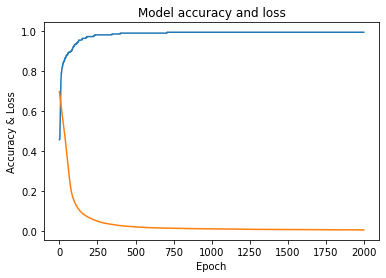

In [13]:
#Visualize loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy and loss')
plt.ylabel('Accuracy & Loss')
plt.xlabel('Epoch')

In [14]:
print("Shape of test data: ", x_test.shape)
print("Shape of training data: ", x_train.shape)

Shape of test data:  (58, 6)
Shape of training data:  (229, 6)


In [15]:
pred = model.predict(x_test)
pred = [1 if y>=0.5 else 0 for y in pred]

print('Original: {0}'.format(', '.join(str(x) for x in y_test)))
print('Predicted: {0}'.format(', '.join(str(x) for x in pred)))

2/2 [==============================] - 0s 9ms/step
Original: 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1
Predicted: 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1


2022-08-20 19:30:05.794819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [16]:
from ann_visualizer.visualize import ann_viz
ann_viz(model ,title='Test')

In [17]:
print("Classification report:\n",classification_report(y_test, pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,pred))
print("Accuracy Score: ", accuracy_score(y_test,pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.96      1.00      0.98        27

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58

Confusion Matrix:
 [[30  1]
 [ 0 27]]
Accuracy Score:  0.9827586206896551
